In [10]:
# インポート
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# ファイルパスを指定
train_file = "train.csv"
test_file = "test.csv"

# データの読み込み
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

# カラム名を変更
column_mapping = {
    "id": "ID",  # インデックスとして使用
    "Age": "Age",  # 年齢
    "BusinessTravel": "BT",  # 出張 (1=出張なし, 2=頻繁に出張, 3=たまに出張)
    "DailyRate": "DR",  # 給与レベル
    "Department": "Dept",  # 部署 (1=人事, 2=研究開発, 3=営業)
    "DistanceFromHome": "DistHome",  # 通勤距離
    "Education": "Edu",  # 学歴 (1=高校以下, 2=大学, 3=学士, 4=修士, 5=博士)
    "EducationField": "EduField",  # 専攻 (1=人事, 2=生命科学, 3=マーケティング, 4=医療科学, 5=その他, 6=技術)
    "EnvironmentSatisfaction": "EnvSat",  # 環境満足度 (1=低い, 2=中程度, 3=高い, 4=非常に高い)
    "Gender": "Gender",  # 性別 (1=女性, 2=男性)
    "HourlyRate": "HR",  # 時給
    "JobInvolvement": "JobInv",  # 仕事熱心度 (1=低い, 2=中程度, 3=高い, 4=非常に高い)
    "JobLevel": "JobLvl",  # 職位
    "JobRole": "JobRole",  # 職種
    "JobSatisfaction": "JobSat",  # 職務満足度 (1=低い, 2=中程度, 3=高い, 4=非常に高い)
    "MaritalStatus": "MarStat",  # 結婚状況 (1=離婚, 2=既婚, 3=未婚)
    "MonthlyIncome": "MonthlyInc",  # 月給
    "NumCompaniesWorked": "NumComp",  # 勤務会社数
    "Over18": "Over18",  # 18歳以上 (1=はい, 2=いいえ)
    "OverTime": "OT",  # 残業 (1=なし, 2=あり)
    "PercentSalaryHike": "PercentSalHike",  # 給与増加率
    "PerformanceRating": "PerfRating",  # 業績評価
    "RelationshipSatisfaction": "RelSat",  # 人間関係満足度
    "StandardHours": "StdHours",  # 標準労働時間
    "StockOptionLevel": "StockOptLvl",  # ストックオプションレベル
    "TotalWorkingYears": "TotalWorkYrs",  # 総勤務年数
    "TrainingTimesLastYear": "TrainTimesLastYr",  # 昨年の訓練回数
    "WorkLifeBalance": "WLB",  # ワークライフバランス
    "YearsAtCompany": "YrsAtCompany",  # 勤続年数
    "YearsInCurrentRole": "YrsInCurrRole",  # 現職の年数
    "YearsSinceLastPromotion": "LastPromo",  # 最終昇進からの年数
    "YearsWithCurrManager": "WithCurrMgr",  # 現マネージャーとの年数
    "Attrition": "Attrition",  # 離職 (0=なし, 1=あり)
}


train_df.rename(columns=column_mapping, inplace=True)
test_df.rename(columns=column_mapping, inplace=True)

# カテゴリーマッピング
business_travel_map = {"Non-Travel": 1, "Travel_Frequently": 2, "Travel_Rarely": 3}
department_map = {"Human Resources": 1, "Research & Development": 2, "Sales": 3}
gender_map = {"Female": 1, "Male": 2}
MarStat_map = {"Divorced": 1, "Married": 2, "Single": 3}
Over18_map = {"Y": 1, "N": 2}
OT_map = {"No": 1, "Yes": 2}

# int型に変換
train_df["BT"] = train_df["BT"].map(business_travel_map).astype(int)
train_df["Dept"] = train_df["Dept"].map(department_map).astype(int)
train_df["Gender"] = train_df["Gender"].map(gender_map).astype(int)
train_df["MarStat"] = train_df["MarStat"].map(MarStat_map).astype(int)
train_df["Over18"] = train_df["Over18"].map(Over18_map).astype(int)
train_df["OT"] = train_df["OT"].map(OT_map).astype(int)
train_df["Attrition"] = train_df["Attrition"].astype(int)

test_df["BT"] = test_df["BT"].map(business_travel_map).astype(int)
test_df["Dept"] = test_df["Dept"].map(department_map).astype(int)
test_df["Gender"] = test_df["Gender"].map(gender_map).astype(int)
test_df["MarStat"] = test_df["MarStat"].map(MarStat_map).astype(int)
test_df["Over18"] = test_df["Over18"].map(Over18_map).astype(int)
test_df["OT"] = test_df["OT"].map(OT_map).astype(int)

# 変換後のデータを確認
# 全ての列が表示されるように設定する
pd.set_option("display.max_columns", None)  # 全ての列を表示
pd.set_option("display.max_rows", None)  # 全ての行を表示
print("Train Dataset:")
print(train_df.head())
print("\nTest Dataset:")
print(test_df.head())

Train Dataset:
   ID  Age  BT           DR  Dept   DistHome  Edu          EduField  EnvSat  \
0   0   26   3   450.941476     2   7.601074    3           Medical       4   
1   3   47   3   730.235896     2  26.739489    3  Technical Degree       2   
2   7   26   3  1082.560066     1   7.374739    3     Life Sciences       2   
3  10   46   3   706.247579     2  14.791373    1           Medical       1   
4  11   25   3   500.610860     2   2.146966    4           Medical       2   

   Gender  HR  JobInv  JobLvl                 JobRole  JobSat  MarStat  \
0       2  43       2       1   Laboratory Technician       2        3   
1       2  98       2       1      Research Scientist       1        1   
2       2  84       2       1         Human Resources       2        2   
3       1  79       2       1   Laboratory Technician       3        1   
4       2  98       3       2  Manufacturing Director       3        1   

   MonthlyInc  NumComp  Over18  OT  PercentSalHike  PerfRating  R

In [11]:
# Attrition ==１の数を集計
attrition_education_counts = (
    train_df[train_df["Attrition"] == 1]["EduField"].value_counts().sort_values()
)
attrition_jobrole_counts = (
    train_df[train_df["Attrition"] == 1]["JobRole"].value_counts().sort_values()
)

# 個数が少ないものから数値に置き換えるためのマッピングを作成
education_map = {
    edu: idx + 1 for idx, edu in enumerate(attrition_education_counts.index)
}
jobrole_map = {job: idx + 1 for idx, job in enumerate(attrition_jobrole_counts.index)}

# マッピングを表示して確認
print("\nEducation Mapping:")
print(education_map)
print("\nJobRole Mapping:")
print(jobrole_map)

# Edu列を数値に置き換え
train_df["EduField"] = train_df["EduField"].map(education_map).astype(int)
test_df["EduField"] = test_df["EduField"].map(education_map).astype(int)

# Job列を数値に置き換え
train_df["JobRole"] = train_df["JobRole"].map(jobrole_map).astype(int)
test_df["JobRole"] = test_df["JobRole"].map(jobrole_map).astype(int)

# 変換後のデータを確認
print("Train Dataset after JobRole mapping:")
print(train_df[["EduField"]].head())
print("\nTest Dataset after JobRole mapping:")
print(test_df[["EduField"]].head())

print("Train Dataset after JobRole mapping:")
print(train_df[["JobRole"]].head())
print("\nTest Dataset after JobRole mapping:")
print(test_df[["JobRole"]].head())


Education Mapping:
{'Human Resources': 1, 'Technical Degree': 2, 'Other': 3, 'Marketing': 4, 'Medical': 5, 'Life Sciences': 6}

JobRole Mapping:
{'Research Director': 1, 'Healthcare Representative': 2, 'Human Resources': 3, 'Manager': 4, 'Manufacturing Director': 5, 'Sales Executive': 6, 'Sales Representative': 7, 'Laboratory Technician': 8, 'Research Scientist': 9}
Train Dataset after JobRole mapping:
   EduField
0         5
1         2
2         6
3         5
4         5

Test Dataset after JobRole mapping:
   EduField
0         6
1         5
2         6
3         5
4         6
Train Dataset after JobRole mapping:
   JobRole
0        8
1        9
2        3
3        8
4        5

Test Dataset after JobRole mapping:
   JobRole
0        9
1        8
2        1
3        4
4        1


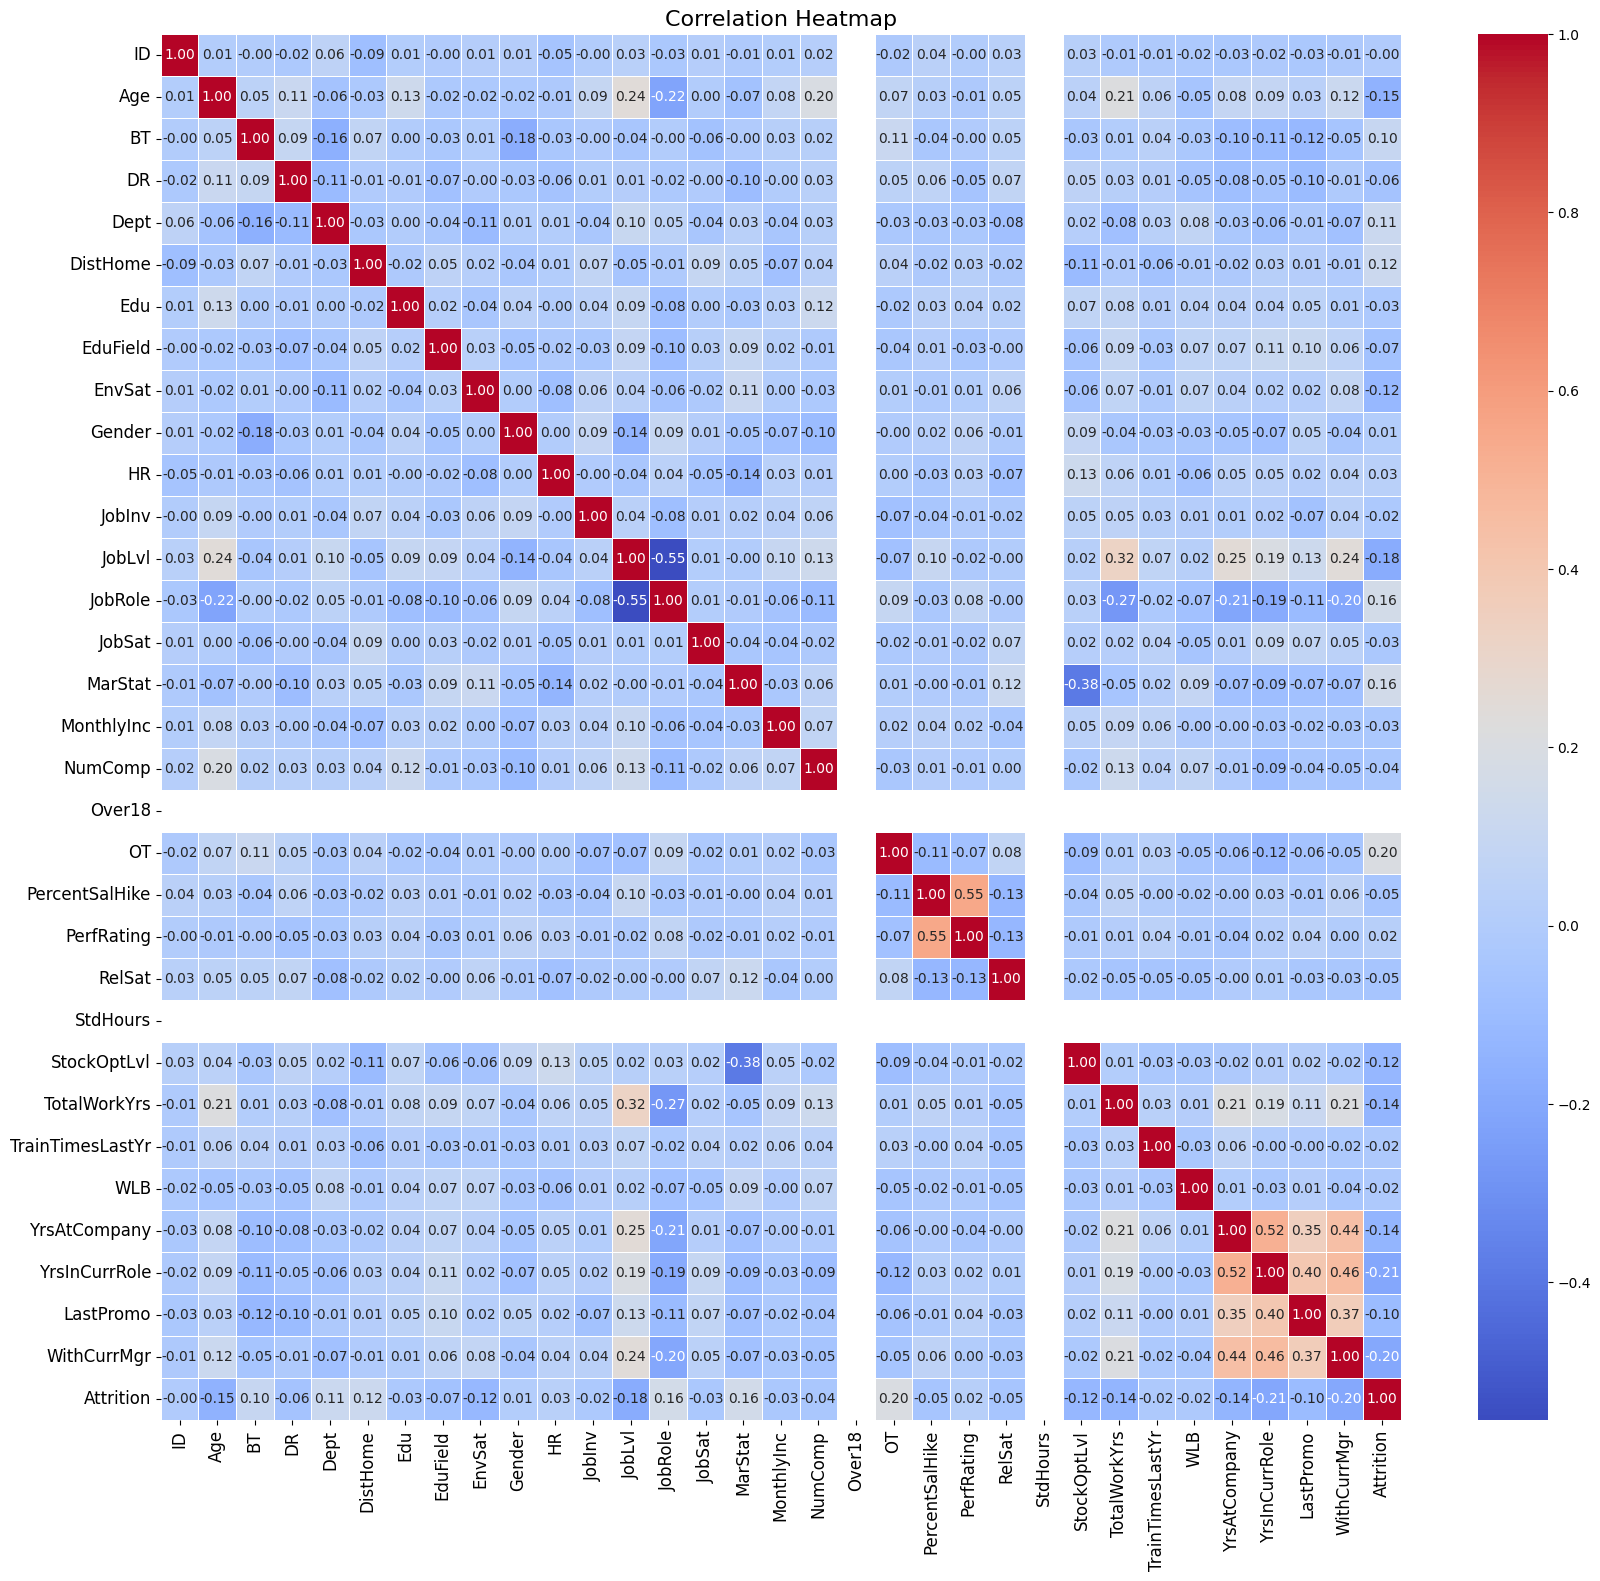

Number of entries with Over18 column value of 2:
Series([], Name: count, dtype: int64)
Number of entries with StdHours column not equal to 80:
Series([], Name: count, dtype: int64)


In [12]:
# 相関行列を計算
corr_matrix = train_df.corr()

# ヒートマップを作成
plt.figure(figsize=(20, 18))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10},
)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# データの偏りの確認
print("Number of entries with Over18 column value of 2:")
print(train_df[train_df["Over18"] == 2]["Over18"].value_counts().sort_values())
print("Number of entries with StdHours column not equal to 80:")
print(train_df[train_df["StdHours"] != 80]["StdHours"].value_counts().sort_values())

Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy: 0.8750


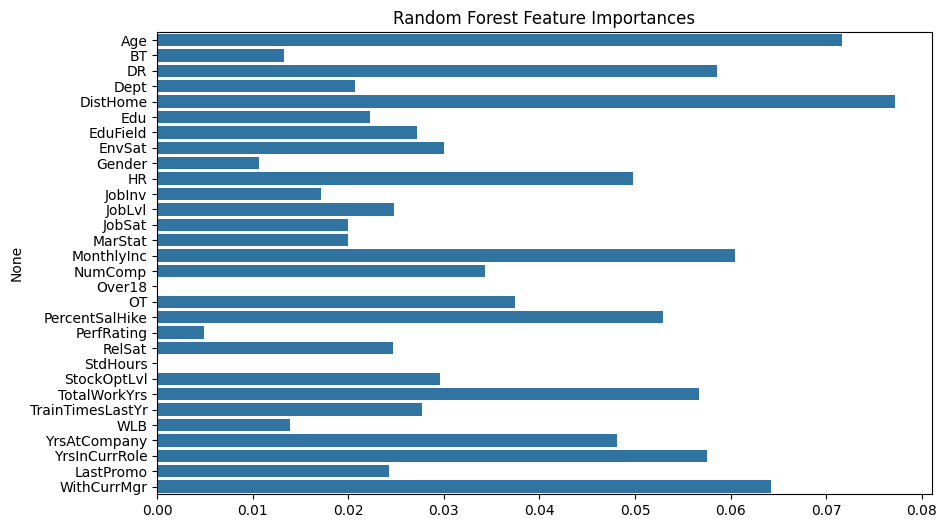

   ID  Attrition
0   1          0
1   2          0
2   4          0
3   5          0
4   6          0
Random Forest Submission file created successfully.


In [13]:
# ランダムフォレストモデルの初期化と設定
model_rf = RandomForestClassifier(
    random_state=41,  # 乱数シード
)

# 訓練データとテストデータの分割
X = train_df.drop(["ID", "Attrition", "JobRole"], axis=1)  # JobRole列を除外
y = train_df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=41
)

# ランダムフォレストモデルの訓練
model_rf.fit(X_train, y_train)

# モデルの評価
train_accuracy_rf = model_rf.score(X_train, y_train)
test_accuracy_rf = model_rf.score(X_test, y_test)

print(f"Random Forest Train Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf:.4f}")

# モデルの特徴量の重要度を取得する
feature_importances_rf = model_rf.feature_importances_

# 特徴量の重要度をプロットする
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_rf, y=X_train.columns)
plt.title("Random Forest Feature Importances")
plt.show()

# テストデータでの予測
X_final_test_rf = test_df.drop(["ID", "JobRole"], axis=1)  # 'JobRole'以外の特徴量を取得
y_final_pred_rf = model_rf.predict(X_final_test_rf)

# 予測結果のデータフレームの作成
df_predictions_rf = pd.DataFrame({"ID": test_df["ID"], "Attrition": y_final_pred_rf})

# 予測結果のデータフレームの表示
print(df_predictions_rf.head())

# 提出ファイルの保存
df_predictions_rf.to_csv("submission_rf.csv", index=False, header=False)
print("Random Forest Submission file created successfully.")